## Notebook to research diabetes onset 
**Matching Every Month**

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext Cython
%reload_ext Cython

In [2]:
import pandas as pd
import numpy as np
import time
import datetime as dt
from pathlib import Path

#custom
from data_functions import make_date_to_MYR
from diabetes_onset import( process_canary,
get_tc, in_canary, diabet_onset,
match_data, not_first_month_diabetes, match_data_per_month, filter_first_month_diabetes)


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.random.seed(seed = 0)

### Load Pmpm Canary data

In [3]:
%%time
canary_p = '../../temp/CANARY.p'
pmpm_p = '../../temp/PMPM.p'

canary = pd.read_pickle(canary_p)
pmpm = pd.read_pickle(pmpm_p)

#drop pmpm duplicates
pmpm.drop_duplicates(subset = ['PERS_ID', 'MYR'], inplace = True)
canary.drop_duplicates(subset = ['PERS_ID'], inplace = True)

CPU times: user 7.4 s, sys: 4.6 s, total: 12 s
Wall time: 13.2 s


### Process Canary, 
1. Drop register dates beyond pmpm max date
2. Transform register date to MYR
3. Keep only ids and MYR

### Get Controls and Treated

In [4]:
%%time
canary2 = process_canary(canary, pmpm.MYR.max())
treated, controls = get_tc(pmpm.copy(), canary2)

CPU times: user 4.14 s, sys: 1.85 s, total: 5.99 s
Wall time: 6.3 s


### Match Per Month

In [5]:
%%time
nocols = ['PERS_ID', 'MYR', 'CC_DIABETES']
common_causes_names = np.setdiff1d(treated.columns, nocols)
neighbors = 30
controls = match_data_per_month(treated.copy(), controls.copy(),
                     common_causes_names = common_causes_names,
                     neighbors = neighbors)

MYR:201701...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201702...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201703...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201704...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201705...matching
MYR:201706...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201707...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201708...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201709...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201710...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201711...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201712...matching
MYR:201801...matching
MYR:201802...matching
MYR:201803...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201804...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201805...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201806...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201807...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201808...matching
MYR:201809...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201810...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201811...matching
MYR:201812...matching
MYR:201901...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201902...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201903...matching
MYR:201904...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201905...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201906...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201907...matching
MYR:201908...matching
MYR:201909...matching
MYR:201910...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201911...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:201912...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202001...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202002...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202003...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202004...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202005...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202006...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202007...matching
MYR:202008...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202009...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202010...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MYR:202011...matching


/home/gmavroud/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Creating the Final Controls Dataset
CPU times: user 36min 10s, sys: 27min 6s, total: 1h 3min 17s
Wall time: 9min 19s


### Get the data for controls and treated to study diabetes onset

In [6]:
controlsf = controls[['PERS_ID', 'MYR', 'CC_DIABETES']]
treatedf = treated[['PERS_ID', 'MYR', 'CC_DIABETES']]
pmpmf = pmpm[['PERS_ID', 'MYR', 'CC_DIABETES']]


In [7]:
controlsf.to_pickle('c1.p')
treatedf.to_pickle('t1.p')

### Get only ids that they appear in their first month with flag 0 in CC Diabetes

In [8]:
%%time
controlsff = filter_first_month_diabetes(controlsf)
treatedff = filter_first_month_diabetes(treatedf)
pmpmff = filter_first_month_diabetes(pmpmf)

CPU times: user 4min 7s, sys: 5.19 s, total: 4min 12s
Wall time: 4min 9s


### Run the Diabetes onset Function

In [9]:
%%time
con_onset = diabet_onset(controlsff.copy(), 'Diabetes_Con')
treated_onset = diabet_onset(treatedff.copy(), 'Diabetes_Tr')
pmpm_onset = diabet_onset(pmpmff.copy(), 'Diabetes_PM')

CPU times: user 1min 26s, sys: 441 ms, total: 1min 27s
Wall time: 1min 27s


In [10]:
treated_cc = in_canary(treatedf.copy(), canary2.copy())
treated_c = filter_first_month_diabetes(treated_cc)
treated_c_onset =  diabet_onset(treated_c.copy(), 'Tr2')

In [11]:
joint = pd.concat((con_onset, treated_onset, pmpm_onset, treated_c_onset), axis = 1)

In [12]:
joint

Sample  Diabetes_Con  Per_1000  Sample  Diabetes_Tr  Per_1000    Sample  Diabetes_PM  Per_1000  Sample  Tr2   Per_1000
MYR                                                                                                                            
201701      NaN           NaN       NaN     NaN          NaN       NaN       NaN          NaN       NaN     NaN  NaN        NaN
201702  19201.0          37.0  1.926983   727.0          0.0  0.000000  122405.0        250.0  2.042400     NaN  NaN        NaN
201703  19112.0          38.0  1.988280   732.0          1.0  1.366120  122264.0        304.0  2.486423     NaN  NaN        NaN
201704  19409.0          23.0  1.185017   735.0          2.0  2.721088  123340.0        269.0  2.180963     NaN  NaN        NaN
201705  19647.0          54.0  2.748511   749.0          0.0  0.000000  123939.0        291.0  2.347929     NaN  NaN        NaN
201706  19811.0          40.0  2.019080   758.0          0.0  0.000000  125212.0        279.0  2.228221     NaN  NaN        NaN
201707  20495.0          43.0  2.098073   767.0          1.0  1.303781  125643.0        254.0  2.021601     NaN  NaN        NaN
201708  20590.0          45.0  2.185527   782.0          0.0  0.000000  125497.0        253.0  2.015984     NaN  NaN        NaN
201709  20884.0          39.0  1.867458   788.0          0.0  0.000000  125687.0        235.0  1.869724     NaN  NaN        NaN
201710  21022.0          28.0  1.331938   791.0          1.0  1.264223  125777.0        222.0  1.765029     NaN  NaN        NaN
201711  20767.0          34.0  1.637213   800.0          0.0  0.000000  126879.0        237.0  1.867921     1.0  0.0   0.000000
201712  21450.0          34.0  1.585082   805.0          0.0  0.000000  127476.0        230.0  1.804261     1.0  0.0   0.000000
201801  21497.0          28.0  1.302507   817.0          0.0  0.000000  125765.0        235.0  1.868564     1.0  0.0   0.000000
201802  22428.0          40.0  1.783485   848.0          0.0  0.000000  129313.0        263.0  2.033825     1.0  0.0   0.000000
201803  22437.0          28.0  1.247939   860.0          0.0  0.000000  130204.0        245.0  1.881663     7.0  0.0   0.000000
201804  23018.0          42.0  1.824659   879.0          0.0  0.000000  132019.0        280.0  2.120907    17.0  0.0   0.000000
201805  23505.0          43.0  1.829398   896.0          0.0  0.000000  133330.0        249.0  1.867547    22.0  0.0   0.000000
201806  24044.0          43.0  1.788388   915.0          0.0  0.000000  134809.0        266.0  1.973162    29.0  0.0   0.000000
201807  23773.0          27.0  1.135742   928.0          0.0  0.000000  136026.0        200.0  1.470307    42.0  0.0   0.000000
201808  24167.0          45.0  1.862043   930.0          1.0  1.075269  136658.0        258.0  1.887925    50.0  0.0   0.000000
201809  24573.0          42.0  1.709193   942.0          1.0  1.061571  137925.0        228.0  1.653072    54.0  0.0   0.000000
201810  24956.0          41.0  1.642891   966.0          2.0  2.070393  138673.0        252.0  1.817225    58.0  0.0   0.000000
201811  26103.0          46.0  1.762250   978.0          2.0  2.044990  140070.0        235.0  1.677733    68.0  1.0  14.705882
201812  25472.0          42.0  1.648869   983.0          0.0  0.000000  141339.0        185.0  1.308910    95.0  0.0   0.000000
201901  25878.0          41.0  1.584357   994.0          0.0  0.000000  135645.0        280.0  2.064212   117.0  0.0   0.000000
201902  27733.0          59.0  2.127429  1063.0          0.0  0.000000  141286.0        292.0  2.066730   175.0  0.0   0.000000
201903  28137.0          53.0  1.883641  1093.0          0.0  0.000000  142188.0        331.0  2.327904   207.0  0.0   0.000000
201904  29002.0          65.0  2.241225  1126.0          3.0  2.664298  144075.0        358.0  2.484817   233.0  0.0   0.000000
201905  29934.0          56.0  1.870782  1147.0          1.0  0.871840  145615.0        373.0  2.561549   259.0  1.0   3.861004
201906  29360.0          51.0  1.737057  

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-dark')

In [14]:
jointcon = joint.Per_1000.iloc[1:, 0].reset_index()
jointTr = joint.Per_1000.iloc[1:, 1].reset_index()
jointpmpm = joint.Per_1000.iloc[1:, 2].reset_index()
jointTr2 = joint.Per_1000.iloc[1:, 3].reset_index()


In [15]:
%%latex
 $f(x)$ = Onset Per 1000 per month 

<IPython.core.display.Latex object>

/home/gmavroud/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/gmavroud/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


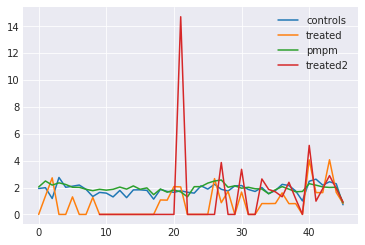

In [16]:
fig, ax = plt.subplots(1,1)
xx = np.arange(len(jointTr))
ax.plot(xx, jointcon.Per_1000, label = 'controls')
ax.plot(xx, jointTr.Per_1000, label = 'treated')
ax.plot(xx, jointpmpm.Per_1000, label = 'pmpm')
ax.plot(xx, jointTr2.Per_1000, label = 'treated2')
#ax.set_xlim(left = 33)
#ax.set_ylim(bottom = 0)
ax.grid()
#ax.set_xticks(jointTr.MYR.values)
#ax.set_xticklabels([str(date) for date in jointTr.MYR.values], rotation = 45)
plt.legend()
fig.show()

In [17]:
%%latex
$F(x) = \int_0^x f(y)dy$ Cumulative sum of the rates

<IPython.core.display.Latex object>

/home/gmavroud/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/gmavroud/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


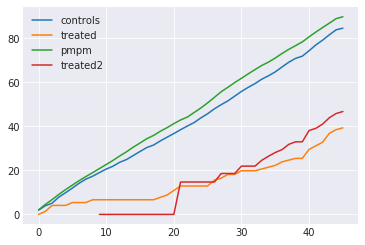

In [18]:
fig, ax = plt.subplots(1,1)
xx = np.arange(len(jointTr))
ax.plot(xx, jointcon.Per_1000.cumsum(), label = 'controls')
ax.plot(xx, jointTr.Per_1000.cumsum(), label = 'treated')
ax.plot(xx, jointpmpm.Per_1000.cumsum(), label = 'pmpm')
ax.plot(xx, jointTr2.Per_1000.cumsum() , label = 'treated2')
#ax.set_xlim(left = 33)
#ax.set_ylim(bottom = 0)
ax.grid()
#ax.set_xticks(jointTr.MYR.values)
#ax.set_xticklabels([str(date) for date in jointTr.MYR.values], rotation = 45)
plt.legend()
fig.show()

### Focus on the slope after month 33

/home/gmavroud/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/gmavroud/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


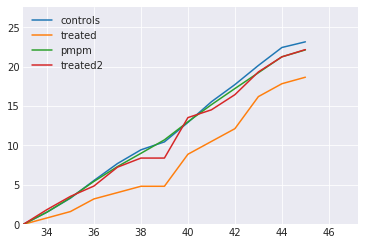

In [19]:
fig, ax = plt.subplots(1,1)
xx = np.arange(len(jointTr))
ax.plot(xx, jointcon.Per_1000.cumsum()-jointcon.Per_1000.cumsum().iloc[33], label = 'controls')
ax.plot(xx, jointTr.Per_1000.cumsum()-jointTr.Per_1000.cumsum().iloc[33], label = 'treated')
ax.plot(xx, jointpmpm.Per_1000.cumsum()-jointpmpm.Per_1000.cumsum().iloc[33], label = 'pmpm')
ax.plot(xx, jointTr2.Per_1000.cumsum() - jointTr2.Per_1000.cumsum().iloc[33], label = 'treated2')
ax.set_xlim(left = 33)
ax.set_ylim(bottom = 0)
ax.grid()
#ax.set_xticks(jointTr.MYR.values)
#ax.set_xticklabels([str(date) for date in jointTr.MYR.values], rotation = 45)
plt.legend()
fig.show()

In [20]:
joint.describe().loc[['mean', 'std']]

Sample  Diabetes_Con  Per_1000       Sample  Diabetes_Tr  Per_1000         Sample  Diabetes_PM  Per_1000      Sample       Tr2  Per_1000
mean  26253.173913     48.695652  1.837837  1017.891304     0.934783  0.854174  141550.543478   275.369565  1.950861  378.621622  0.648649  1.262788
std    4634.798652     15.613199  0.411314   192.945269     1.218417  1.062669   13456.572672    46.930852  0.301403  387.260489  1.059775  2.631552

In [21]:
controls.ALLOW_AMT.describe()

count    2.134708e+06
mean     7.630330e+02
std      4.355623e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.500000e+02
75%      4.780000e+02
max      1.853389e+06
Name: ALLOW_AMT, dtype: float64

In [22]:
treated.ALLOW_AMT.describe()

count     49900.000000
mean        738.448357
std        3336.697851
min           0.000000
25%           4.000000
50%         160.000000
75%         472.000000
max      395200.000000
Name: ALLOW_AMT, dtype: float64

In [23]:
pmpm3 = pmpm.merge(canary2, on = ['PERS_ID', 'MYR'], how = 'inner')

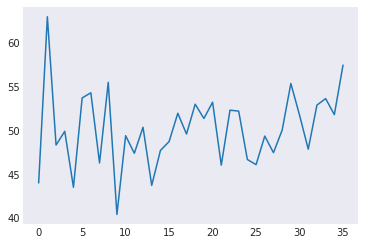

In [24]:
fig, ax = plt.subplots(1,1)
ax.plot(pmpm3.groupby('MYR').AGE_AT_MIDMONTH.mean().values)
fig.show()

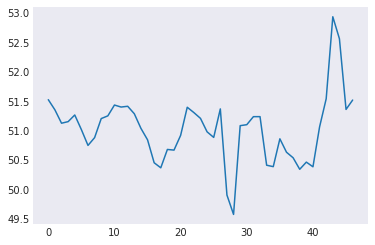

In [25]:
plt.plot(controls.groupby('MYR').AGE_AT_MIDMONTH.mean().values)
plt.show()

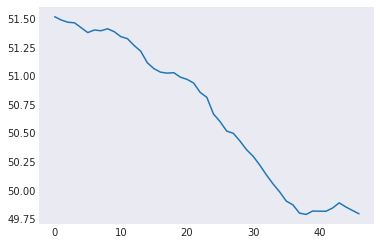

In [26]:
plt.plot(pmpm.groupby('MYR').AGE_AT_MIDMONTH.mean().values)
plt.show()